# Manipulation de données avec pandas


Pour avoir accès aux fonctionnalités de `pandas`, il est de coutume de charger la librairie en lui accordant l'alias `pd`. Nous allons également utiliser des fonctions de `numpy` et des outils de visualisation de ```matplotlib.pyplot```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas fournit essentiellement deux structures de données pour manipuler les données, ce sont les `Series` et les `Dataframe`

## Les `Series`

Une série est un tableau étiqueté unidimensionnel pouvant contenir tout type de données. Lors de l'affichage la (ou les)  première(s) colonne(s) contiennent les étiquettes qui représentent l'index de la série


In [2]:
dict_club={1:'Arsenal',2:'Aston Villa',5:'Chelsea',7:'Everton',8:'Leeds United'}
serie_club_d=pd.Series(dict_club)
print(f'Avec un dict, serie_club_d :\n{serie_club_d}')

serie_club=pd.Series(['Arsenal','Aston Villa','Chelsea','Everton','Leeds United'],index=[1,2,5,7,8])
print(f'Avec index renseigné, serie_club :\n{serie_club}')

#Sans index renseigné, une indexation est définie par défaut
serie_club2=pd.Series(['Arsenal','Aston Villa','Chelsea','Everton','Leeds United'])
print(f'Sans index renseigné\n{serie_club2}')

#Avec une double indexation 
serie_club_3=pd.Series(['Arsenal','Aston Villa','Chelsea','AS Monaco','Angers SCO'],index=[['English Premier League']*3+['French Ligue 1']*2,[1,2,3,1,2]])
print(f'Avec une double indexation\n{serie_club_3}')

Avec un dict, serie_club_d :
1         Arsenal
2     Aston Villa
5         Chelsea
7         Everton
8    Leeds United
dtype: object
Avec index renseigné, serie_club :
1         Arsenal
2     Aston Villa
5         Chelsea
7         Everton
8    Leeds United
dtype: object
Sans index renseigné
0         Arsenal
1     Aston Villa
2         Chelsea
3         Everton
4    Leeds United
dtype: object
Avec une double indexation
English Premier League  1        Arsenal
                        2    Aston Villa
                        3        Chelsea
French Ligue 1          1      AS Monaco
                        2     Angers SCO
dtype: object


Si on veut ajouter des noms à la série ou à l'index :

In [3]:
serie_club.name='Nom club'
serie_club.index.name='Id_club'
print(serie_club)

Id_club
1         Arsenal
2     Aston Villa
5         Chelsea
7         Everton
8    Leeds United
Name: Nom club, dtype: object


Si on veut récupérer l'ensemble des valeurs de la série ou de l'index :

In [4]:
print(serie_club.values)
print(type(serie_club.values))
print(serie_club.index.values)

['Arsenal' 'Aston Villa' 'Chelsea' 'Everton' 'Leeds United']
<class 'numpy.ndarray'>
[1 2 5 7 8]


Pour interroger les valeurs stockées dans un objet `Series` on peut fonctionner de différentes manières. La méthode `iloc` fournit une méthode de sélection selon la position de l'élément voulu alors que `loc` exploite la valeur de l'index. L'opérateur d'indexation `[]` aplliqué directement à un objet `Series` peut être également utilisé mais il faut être conscient de son comportement qui correspond soit à celui de `loc` soit à celui de `iloc` selon la valeur passée. Lorsque les deux traitements sont possibles le comportement adopté est celui de la méthode `loc`

In [5]:
print(serie_club)
print('serie_club.loc[1] : ',serie_club.loc[1])
print('serie_club[1] : ',serie_club[1])
print(f'serie_club[[1,7]] :\n{serie_club[[1,7]]}')
print(f'serie_club.iloc[1] : {serie_club.iloc[1]}')
print(f'serie_club.iloc[0:3] :\n{serie_club.iloc[0:3]}')
print(f'serie_club[1:] :\n{serie_club[1:]}')

Id_club
1         Arsenal
2     Aston Villa
5         Chelsea
7         Everton
8    Leeds United
Name: Nom club, dtype: object
serie_club.loc[1] :  Arsenal
serie_club[1] :  Arsenal
serie_club[[1,7]] :
Id_club
1    Arsenal
7    Everton
Name: Nom club, dtype: object
serie_club.iloc[1] : Aston Villa
serie_club.iloc[0:3] :
Id_club
1        Arsenal
2    Aston Villa
5        Chelsea
Name: Nom club, dtype: object
serie_club[1:] :
Id_club
2     Aston Villa
5         Chelsea
7         Everton
8    Leeds United
Name: Nom club, dtype: object


## Les `Dataframe`
La `Dataframe` est une structure qui organise les données en lignes et en colonnes. On peut aussi se la représenter comme un dictionnaire d'objets `Series`. C'est l'objet `pandas` le plus utilisé.

In [6]:
dico_players={
    "Player_name" : pd.Series(['L. Messi','P. Dybala','E. Martinez','G. Lo Celso','N.Otamendi','K. Mbappé','J. Veretout','H. Lloris']),
    "Nationality" : pd.Series(['Argentina']*5+['France']*3),
    "Player_club_id" : pd.Series([73,45,2,18,234,73,52,18]),
    "Age" : pd.Series([33,26,27,24,32,21,27,33]),
    "ValueEUR" : pd.Series([103500000,95000000,33000000,38500000,13500000,185500000,26500000,26000000])
}
data_players=pd.DataFrame(dico_players)
print(data_players,'\n')
print(data_players[:2],'\n')
print(data_players.sort_values(['ValueEUR'],ascending=False))


   Player_name Nationality  Player_club_id  Age   ValueEUR
0     L. Messi   Argentina              73   33  103500000
1    P. Dybala   Argentina              45   26   95000000
2  E. Martinez   Argentina               2   27   33000000
3  G. Lo Celso   Argentina              18   24   38500000
4   N.Otamendi   Argentina             234   32   13500000
5    K. Mbappé      France              73   21  185500000
6  J. Veretout      France              52   27   26500000
7    H. Lloris      France              18   33   26000000 

  Player_name Nationality  Player_club_id  Age   ValueEUR
0    L. Messi   Argentina              73   33  103500000
1   P. Dybala   Argentina              45   26   95000000 

   Player_name Nationality  Player_club_id  Age   ValueEUR
5    K. Mbappé      France              73   21  185500000
0     L. Messi   Argentina              73   33  103500000
1    P. Dybala   Argentina              45   26   95000000
3  G. Lo Celso   Argentina              18   24   38500

On peut avoir le souhait de remplacer les valeurs d'une colonne (ici les âges des joueurs sont ceux de 2021, on va leur rajouter 2 années) ou de rajouter une colonne avec un calcul effectué

In [7]:
new_df=data_players.copy()
new_df['Valeur par année avant retraite']=new_df['ValueEUR']/(40-new_df['Age'])
#print(new_df.loc[:2,'Age'])
new_df.loc[new_df.Age>0,'Age']=new_df.Age+2
print(new_df)

   Player_name Nationality  Player_club_id  Age   ValueEUR  \
0     L. Messi   Argentina              73   35  103500000   
1    P. Dybala   Argentina              45   28   95000000   
2  E. Martinez   Argentina               2   29   33000000   
3  G. Lo Celso   Argentina              18   26   38500000   
4   N.Otamendi   Argentina             234   34   13500000   
5    K. Mbappé      France              73   23  185500000   
6  J. Veretout      France              52   29   26500000   
7    H. Lloris      France              18   35   26000000   

   Valeur par année avant retraite  
0                     1.478571e+07  
1                     6.785714e+06  
2                     2.538462e+06  
3                     2.406250e+06  
4                     1.687500e+06  
5                     9.763158e+06  
6                     2.038462e+06  
7                     3.714286e+06  


On peut avoir recours à l'utilisation de certaines méthodes (ci-dessous l'affichage de statistiques diverses ou encore le remplacement de l'indexation effectuée par défaut), ou certains attributs comme des noms ou les dimensions de la structure créée

In [8]:
print(data_players['Age'].describe())
data_players.set_index([pd.Series([158023,211110,202811,226226,192366,231747,201519,167948],name='Player_ID')],inplace=True)
#et si on veut revenir sur ce dernier choix :
data_players.reset_index(inplace=True,drop=True)
print(data_players.index.names,' ou ',data_players.index.name)
print(data_players.shape)
print(data_players)

count     8.000000
mean     27.875000
std       4.421942
min      21.000000
25%      25.500000
50%      27.000000
75%      32.250000
max      33.000000
Name: Age, dtype: float64
[None]  ou  None
(8, 5)
   Player_name Nationality  Player_club_id  Age   ValueEUR
0     L. Messi   Argentina              73   33  103500000
1    P. Dybala   Argentina              45   26   95000000
2  E. Martinez   Argentina               2   27   33000000
3  G. Lo Celso   Argentina              18   24   38500000
4   N.Otamendi   Argentina             234   32   13500000
5    K. Mbappé      France              73   21  185500000
6  J. Veretout      France              52   27   26500000
7    H. Lloris      France              18   33   26000000


Il peut être particulièrement pratique d'utiliser un masque pour ne sélectionner que certaines données selon un ou plusieurs critères

In [9]:
mask_selection_1=(data_players['Nationality']=='Argentina')&(data_players['Age']>=30) #Vous avez essayé avec and ?
mask_selection_2=(data_players.Nationality=='France')|(data_players['Age']<30)
selection_1=data_players[mask_selection_1][['Nationality','Age']]
selection_2=data_players[mask_selection_2]
print(selection_1)
print(selection_2)


  Nationality  Age
0   Argentina   33
4   Argentina   32
   Player_name Nationality  Player_club_id  Age   ValueEUR
1    P. Dybala   Argentina              45   26   95000000
2  E. Martinez   Argentina               2   27   33000000
3  G. Lo Celso   Argentina              18   24   38500000
5    K. Mbappé      France              73   21  185500000
6  J. Veretout      France              52   27   26500000
7    H. Lloris      France              18   33   26000000


Si on veut fusionner deux sources de données déjà structurées en `dataframe` en une seule on peut le faire avec la méthode de concaténation

In [10]:
selection=pd.concat([selection_1,selection_2])
print(selection)

  Nationality  Age  Player_name  Player_club_id     ValueEUR
0   Argentina   33          NaN             NaN          NaN
4   Argentina   32          NaN             NaN          NaN
1   Argentina   26    P. Dybala            45.0   95000000.0
2   Argentina   27  E. Martinez             2.0   33000000.0
3   Argentina   24  G. Lo Celso            18.0   38500000.0
5      France   21    K. Mbappé            73.0  185500000.0
6      France   27  J. Veretout            52.0   26500000.0
7      France   33    H. Lloris            18.0   26000000.0


On peut éventuellement avoir le souhait de traiter les valeurs manquantes de différentes manières. Voici quelques exemples

In [11]:
print(selection[selection['Player_name'].isnull()],'\n')
print(selection[selection['Player_name'].notnull()],'\n')
print(selection.dropna(inplace=False),'\n')
print(selection.fillna(value={'Player_name':'Footballeur inconnu','ValueEUR':0}))

  Nationality  Age Player_name  Player_club_id  ValueEUR
0   Argentina   33         NaN             NaN       NaN
4   Argentina   32         NaN             NaN       NaN 

  Nationality  Age  Player_name  Player_club_id     ValueEUR
1   Argentina   26    P. Dybala            45.0   95000000.0
2   Argentina   27  E. Martinez             2.0   33000000.0
3   Argentina   24  G. Lo Celso            18.0   38500000.0
5      France   21    K. Mbappé            73.0  185500000.0
6      France   27  J. Veretout            52.0   26500000.0
7      France   33    H. Lloris            18.0   26000000.0 

  Nationality  Age  Player_name  Player_club_id     ValueEUR
1   Argentina   26    P. Dybala            45.0   95000000.0
2   Argentina   27  E. Martinez             2.0   33000000.0
3   Argentina   24  G. Lo Celso            18.0   38500000.0
5      France   21    K. Mbappé            73.0  185500000.0
6      France   27  J. Veretout            52.0   26500000.0
7      France   33    H. Lloris 

### Les jointures
Pour avoir des jointures plus élaborées pour rassembler différentes sources de données on utilise la fonction `merge()`
La fonction nécessite de préciser la table de gauche (que l'on appellera ici `x`) via le paramètre `left` et une table de droite (que l'on appellera ici `y`) via le paramètre `right`.
Les types de jointure sont les suivants (on le spécifie dans la fonction avec le paramètre `how`) :

* `left` : toutes les lignes de `x` et toutes les colonnes des deux tables (avec une correspondance entre tables établie sur les colonnes respectivement mentionnées dans `left_on` et `right_on`). Les lignes de `x` pour lesquelles il n'y a pas de correspondance dans `y` auront des valeurs `NaN` dans les colonnes associées initialement à `y`. S'il y a plusieurs correspondances toutes les combinaisons possibles sont retournées.

* `inner` : toutes les lignes de `x` pour lesquelles il y a des valeurs correspondantes dans `y`, et toutes les colonnes de `x` et `y`. S'il y a plusieurs correspondances toutes les combinaisons possibles sont retournées.

* `outer` : toutes les lignes de `x` et de `y` et toutes les colonnes de `x` et de `y`. Les lignes de `x` pour lesquelles il n'y a pas de correspondance dans `y` auront des valeurs `NaN` dans les colonnes associées initialement à `y` et les lignes de `y` pour lesquelles il n'y a pas de correspondance dans `x` auront des valeurs `NaN` dans les colonnes associées initialement à `x`

In [19]:
dico_clubs={
    'Club_id':[2,5,18,45,52,71,73,234],
    'Club_name':['Aston Villa','Chelsea','Tottenham Hotspur','Juventus','Roma','FC Nantes','Paris Saint-Germain','SL Benfica'],
    'League':['English Premier League']*3+['Italian Serie A']*2+['French Ligue 1']*2+['Portuguese Liga']
}
data_clubs=pd.DataFrame(dico_clubs)
data_clubs_anglais=data_clubs[(data_clubs.League=='English Premier League')]

qui_qui_joue_dans_ces_clubs=pd.merge(left=data_clubs_anglais,right=data_players,how='left',left_on=['Club_id'],right_on=['Player_club_id'])
print(f"left :\n{qui_qui_joue_dans_ces_clubs[['Club_name','Player_name']]}\n")

qui_qui_joue_dans_ces_clubs_2=pd.merge(left=data_clubs_anglais,right=data_players,how='inner',left_on=['Club_id'],right_on=['Player_club_id'])
print(f"inner :\n{qui_qui_joue_dans_ces_clubs_2[['Club_name','Player_name']]}\n")

qui_qui_joue_dans_ces_clubs_3=pd.merge(left=data_clubs_anglais,right=data_players,how='outer',left_on=['Club_id'],right_on=['Player_club_id'])
print(f"outer :\n{qui_qui_joue_dans_ces_clubs_3[['Club_name','Player_name']]}")

left :
           Club_name  Player_name
0        Aston Villa  E. Martinez
1            Chelsea          NaN
2  Tottenham Hotspur  G. Lo Celso
3  Tottenham Hotspur    H. Lloris

inner :
           Club_name  Player_name
0        Aston Villa  E. Martinez
1  Tottenham Hotspur  G. Lo Celso
2  Tottenham Hotspur    H. Lloris

outer :
           Club_name  Player_name
0        Aston Villa  E. Martinez
1            Chelsea          NaN
2  Tottenham Hotspur  G. Lo Celso
3  Tottenham Hotspur    H. Lloris
4                NaN     L. Messi
5                NaN    K. Mbappé
6                NaN    P. Dybala
7                NaN   N.Otamendi
8                NaN  J. Veretout


Pour effectuer des calculs d'agrégats (avec des fonction d'agrégation `sum`, `mean`, `count`, `median`, ...) sur certaines colonnes on peut utiliser la méthode `groupby` qui permet d'expliciter des critères sur une ou plusieurs colonnes qui seront utilisées comme index dans la dataframe renvoyée. Si on veut pouvoir appliquer différentes fonctions d'agrégation selon les colonnes on utilise la méthode `agg`. 

Remarque : la méthode `groupby` s'appliquant aux colonnes de la dataframe, si on souhaite grouper selon les valeurs de l'index on devra effectuer d'abord un `reset_index` pour replacer ses valeurs en colonne.

In [27]:
joueurs_par_clubs=pd.merge(left=data_clubs,right=data_players,how='inner',left_on=['Club_id'],right_on=['Player_club_id'])[['Club_name','Player_name','League','Age','ValueEUR']]
print(f"joueurs_par_clubs :\n{joueurs_par_clubs}\n")
calculs_moyennes_par_league=joueurs_par_clubs.groupby(['League'])[['Age','ValueEUR']].mean()
print(f'Calculs âge et valeur moyenne par league :\n{calculs_moyennes_par_league}\n')
calculs_divers_par_league=joueurs_par_clubs.groupby(['League']).agg({'Age':['mean'],'ValueEUR':['mean','sum']})
print(f'Calculs divers par league :\n{calculs_divers_par_league}\n')

joueurs_par_clubs :
             Club_name  Player_name                  League  Age   ValueEUR
0          Aston Villa  E. Martinez  English Premier League   27   33000000
1    Tottenham Hotspur  G. Lo Celso  English Premier League   24   38500000
2    Tottenham Hotspur    H. Lloris  English Premier League   33   26000000
3             Juventus    P. Dybala         Italian Serie A   26   95000000
4                 Roma  J. Veretout         Italian Serie A   27   26500000
5  Paris Saint-Germain     L. Messi          French Ligue 1   33  103500000
6  Paris Saint-Germain    K. Mbappé          French Ligue 1   21  185500000
7           SL Benfica   N.Otamendi         Portuguese Liga   32   13500000

Calculs âge et valeur moyenne par league :
                         Age     ValueEUR
League                                   
English Premier League  28.0   32500000.0
French Ligue 1          27.0  144500000.0
Italian Serie A         26.5   60750000.0
Portuguese Liga         32.0   13500000.0


## Importer des données

Pour importer des données depuis un fichier CSV, `pandas` propose la fonction `read_csv`. Parmi les paramètres que l'on peut utiliser on citera :

* `sep` : séparateur de champs (par défaut la virgule)
* `index_col` : numéro(s) de colonne(s) à utiliser pour l'index (par défaut `None`)
* `decimal` : caractère représentant le passage aux décimales (par défaut `.`)
* `encoding` : encodage des caractères (par défaut `utf-8`)

In [33]:
data_joueurs = pd.read_csv('donnees_fifa/players.csv',sep=';')
data_equipes=pd.read_csv('donnees_fifa/teams.csv',sep=';')
print(list(data_joueurs.columns))
print(data_joueurs[data_joueurs.columns[:5]].head(5),'\n')
print(data_equipes[data_equipes.columns[:3]].head(5))

['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl', 'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats', 'BaseStats', 'Positions', 'BestPosition', 'Club_id', 'ValueEUR', 'WageEUR', 'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber', 'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition', 'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot', 'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'G

**Question 1** : Afficher le tableau présentant l'âge moyen et les moyennes, médianes et valeurs maximales pour les revenus (`WageEUR`) à l'intérieur de chaque club de ligue 1 en France.

In [65]:

joueurs_avec_clubs=pd.merge(left=data_joueurs,right=data_equipes,how='inner',left_on=['Club_id'],right_on=['ID'])

joueurs_ligue_1 =joueurs_avec_clubs[joueurs_avec_clubs.League == "French Ligue 1 (1)"]
calculs_moyennes_par_club=(joueurs_ligue_1[['Name_y','Age','WageEUR']].groupby(['Name_y'])).agg({'Age':['mean'],'WageEUR':['mean','sum']})

print(calculs_moyennes_par_club)

                                Age       WageEUR         
                               mean          mean      sum
Name_y                                                    
AS Monaco                 23.142857  31892.857143   893000
AS Saint-Ã‰tienne         23.156250  13829.687500   442550
Angers SCO                25.090909  13056.060606   430850
Dijon FCO                 23.620690   9072.413793   263100
FC Girondins de Bordeaux  24.807692  19269.230769   501000
FC Lorient                25.966667  13433.333333   403000
FC Metz                   23.100000   8133.333333   244000
FC Nantes                 23.969697  12090.909091   399000
LOSC Lille                22.633333  20543.333333   616300
Montpellier HSC           23.928571  16964.285714   475000
NÃ®mes Olympique          23.843750   9953.125000   318500
OGC Nice                  22.296296  21925.925926   592000
Olympique Lyonnais        22.892857  36035.714286  1009000
Olympique de Marseille    23.375000  21934.375000   7019

**Question 2** : Comparer avec des diagrammes en boîtes à moustaches (`plt.boxplot`) les salaires de ligue 1 et de ligue 2.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6a22c21850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6a22c21f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6a22c214f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6a22c29610>,
 'fliers': [],
 'means': []}

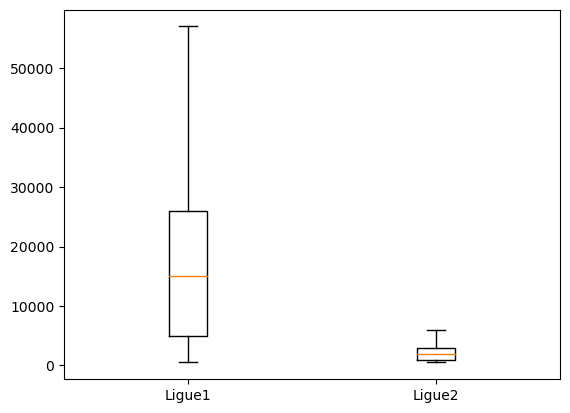

In [75]:
joueurs_ligue_2 =joueurs_avec_clubs[joueurs_avec_clubs.League == "French Ligue 2 (2)"]

#joueurs_ligue_1et2 = pd.concat([joueurs_ligue_1,joueurs_ligue_2])
plt.boxplot([joueurs_ligue_1['WageEUR'], joueurs_ligue_2['WageEUR']],labels=["Ligue1", "Ligue2"], showfliers=False)

**Question 3** : Afficher un diagramme en barres représentant l'évaluation des compétences en dribble, accélération, agilité et vision de jeu (`Dribbling`, `Acceleration`, `Agility`, `Vision`) pour un joueur dont on spécifie l'identifiant `ID`.

          Name  Dribbling  Acceleration  Agility  Vision
26  T. MÃ¼ller         76            68       74      85


<function matplotlib.pyplot.show(close=None, block=None)>

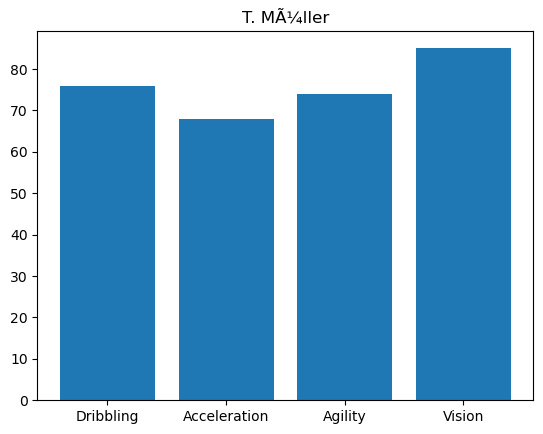

In [91]:
id = input("Entrer un id :")
joueur = data_joueurs.loc[data_joueurs['ID'] == int(id)]
joueur = joueur[["Name","Dribbling", "Acceleration", "Agility", "Vision"]]
print(joueur)
plt.bar(["Dribbling", "Acceleration", "Agility", "Vision"],joueur.iloc[0,1:5])
plt.title(joueur.iloc[0,0])
plt.show

**Question 4** : Représenter la distribution des salaires parmi les joueurs appartenant à des équipes ayant un budget de transfert supérieur ou égal à 50 millions (représentation par intervalles de 50000 euros d'amplitude).

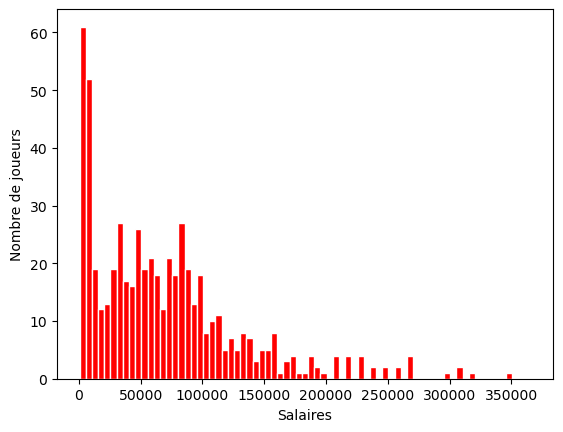

In [118]:
data_joueurs_budget=pd.merge(left=data_joueurs,right=data_equipes,how='inner',left_on=['Club_id'],right_on=['ID'])
data_joueurs_budget=data_joueurs_budget[data_joueurs_budget['TransferBudget']>=50000000]
salaires=data_joueurs_budget['WageEUR']

plt.hist(salaires,bins=range(salaires.min(),salaires.max(),5000),color = 'red',edgecolor='white')
plt.xlabel('Salaires')
plt.ylabel('Nombre de joueurs')
plt.show()